In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255.0

In [5]:
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [6]:
model = Sequential([
Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
MaxPooling2D((2, 2)),
Conv2D(64, (3, 3), activation='relu'),MaxPooling2D((2, 2)),
Conv2D(64, (3, 3), activation='relu'),
Flatten(),
Dense(64, activation='relu'),
Dense(10, activation='softmax')])

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val,y_val))

Epoch 1/10
844/844 [==============================] - 57s 64ms/step - loss: 0.5655 - accuracy: 0.7930 - val_loss: 0.4079 - val_accuracy: 0.8453
Epoch 2/10
844/844 [==============================] - 50s 59ms/step - loss: 0.3566 - accuracy: 0.8701 - val_loss: 0.3337 - val_accuracy: 0.8798
Epoch 3/10
844/844 [==============================] - 51s 61ms/step - loss: 0.3077 - accuracy: 0.8885 - val_loss: 0.3128 - val_accuracy: 0.8835
Epoch 4/10
844/844 [==============================] - 49s 58ms/step - loss: 0.2735 - accuracy: 0.8998 - val_loss: 0.2861 - val_accuracy: 0.8968
Epoch 5/10
844/844 [==============================] - 48s 57ms/step - loss: 0.2484 - accuracy: 0.9091 - val_loss: 0.2643 - val_accuracy: 0.9045
Epoch 6/10
844/844 [==============================] - 49s 58ms/step - loss: 0.2282 - accuracy: 0.9156 - val_loss: 0.2565 - val_accuracy: 0.9055
Epoch 7/10
844/844 [==============================] - 49s 58ms/step - loss: 0.2105 - accuracy: 0.9221 - val_loss: 0.2569 - val_accuracy:

In [9]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

313/313 [==============================] - 3s 9ms/step - loss: 0.2554 - accuracy: 0.9106
Test Accuracy: 91.06%


In [10]:
model.save('fashion_model.keras')

In [11]:
from tensorflow.keras.models import load_model
loaded_model = load_model('fashion_model.keras')

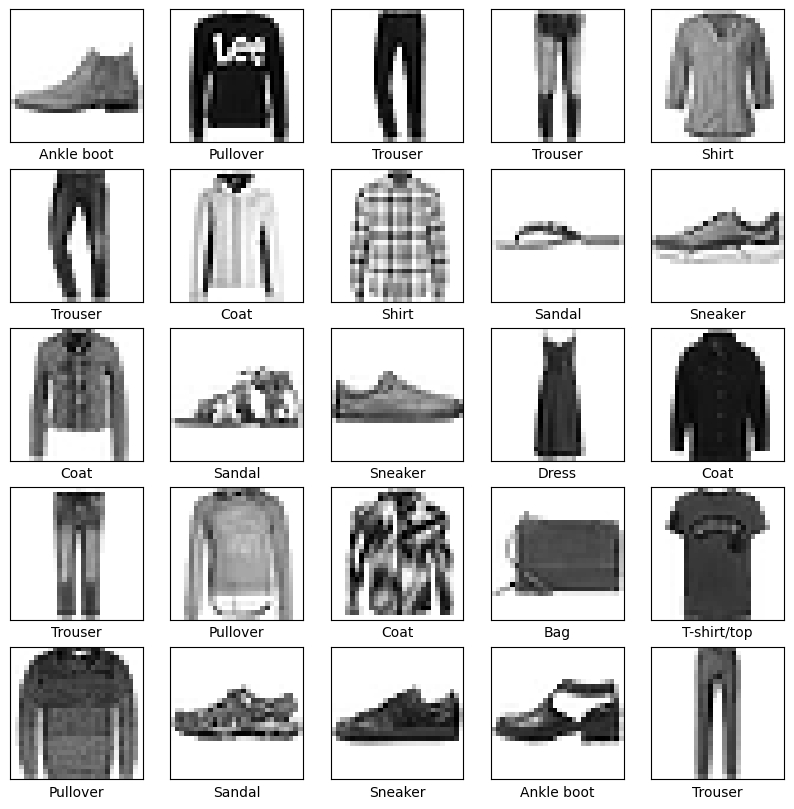

In [15]:
# Assuming fashion_labels is a list
fashion_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Assuming fashion_labels is a dictionary
fashion_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(fashion_labels[y_test[i]])
plt.show()

In [26]:
#Make predictions on new data
# Example input for prediction
sample_image = X_test[0:1]
# Predict the class probabilities
predicted_probabilities = loaded_model.predict(sample_image)
# Get the index of the class with the highest probability
predicted_class_index = np.argmax(predicted_probabilities)
# Define the fashion category labels
fashion_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}
# Convert the predicted class index to the corresponding fashion category label
predicted_label = fashion_labels[predicted_class_index]
print(f"The predicted clothing category is: {predicted_label}")

1/1 [==============================] - 0s 32ms/step
The predicted clothing category is: Ankle boot


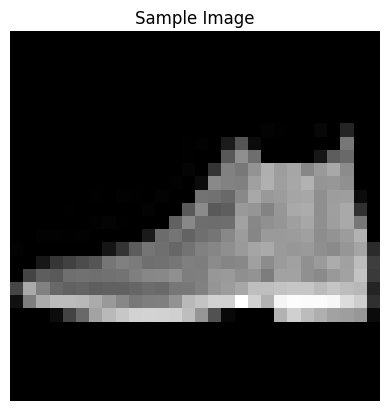

In [27]:
# Visualize the sample image
import matplotlib.pyplot as plt
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.title("Sample Image")
plt.show()